![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Sentiment Classification

### Dataset
- Dataset of 50,000 movie reviews from IMDB, labeled by sentiment positive (1) or negative (0)
- Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).
- For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".
- As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

Command to import data
- `from tensorflow.keras.datasets import imdb`

### Import the data (2 Marks)
- Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

In [ ]:
from tensorflow.keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding,LSTM,Dropout,TimeDistributed,Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
import numpy as np
random_state = 42
np.random.seed(random_state)

In [ ]:
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
print("Train-set size: ", len(X_train))
print("Test-set size:  ", len(X_test))

Train-set size:  25000
Test-set size:   25000


### Pad each sentence to be of same length (2 Marks)
- Take maximum sequence length as 300

In [ ]:
X_train_padded = pad_sequences(X_train, maxlen=300, padding='pre')
X_test_padded = pad_sequences(X_test, maxlen=300, padding='pre')

### Print shape of features & labels (2 Marks)

Number of review, number of words in each review

In [ ]:
for i in range(X_train.shape[0]):
  print('The ', i, 'th train review has ', len(X_train[i]), 'words')

Streaming output truncated to the last 5000 lines.
The  20001 th train review has  118 words
The  20002 th train review has  67 words
The  20003 th train review has  198 words
The  20004 th train review has  53 words
The  20005 th train review has  525 words
The  20006 th train review has  151 words
The  20007 th train review has  123 words
The  20008 th train review has  263 words
The  20009 th train review has  179 words
The  20010 th train review has  427 words
The  20011 th train review has  151 words
The  20012 th train review has  114 words
The  20013 th train review has  122 words
The  20014 th train review has  172 words
The  20015 th train review has  182 words
The  20016 th train review has  135 words
The  20017 th train review has  220 words
The  20018 th train review has  487 words
The  20019 th train review has  432 words
The  20020 th train review has  99 words
The  20021 th train review has  975 words
The  20022 th train review has  157 words
The  20023 th train review h

In [ ]:
for i in range(X_test.shape[0]):
  print('The ', i, 'th test review has ', len(X_train[i]), 'words')

Streaming output truncated to the last 5000 lines.
The  20001 th test review has  118 words
The  20002 th test review has  67 words
The  20003 th test review has  198 words
The  20004 th test review has  53 words
The  20005 th test review has  525 words
The  20006 th test review has  151 words
The  20007 th test review has  123 words
The  20008 th test review has  263 words
The  20009 th test review has  179 words
The  20010 th test review has  427 words
The  20011 th test review has  151 words
The  20012 th test review has  114 words
The  20013 th test review has  122 words
The  20014 th test review has  172 words
The  20015 th test review has  182 words
The  20016 th test review has  135 words
The  20017 th test review has  220 words
The  20018 th test review has  487 words
The  20019 th test review has  432 words
The  20020 th test review has  99 words
The  20021 th test review has  975 words
The  20022 th test review has  157 words
The  20023 th test review has  63 words
The  20024

In [ ]:
import numpy as np

print('***'*20, f'\nNumber of rows in training dataset: {X_train_padded.shape[0]}')
print(f'Number of columns in training dataset: {X_train_padded.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(X_train_padded)))}')


print('***'*20, f'\nNumber of rows in test dataset: {X_test_padded.shape[0]}')
print(f'Number of columns in test dataset: {X_test_padded.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(X_test_padded)))}')

************************************************************ 
Number of rows in training dataset: 25000
Number of columns in training dataset: 300
Number of unique words in training dataset: 9999
************************************************************ 
Number of rows in test dataset: 25000
Number of columns in test dataset: 300
Number of unique words in test dataset: 9943


Number of labels

In [ ]:
dicts = {'Negative':0,'Positive':0}
for i in y_train:
  if(y_train[i] == 0):
    dicts['Negative'] += 1
  else:
    dicts['Positive'] += 1
print("Individual count of reviews in train labels",dict)

Individual count of reviews in train labels <class 'dict'>


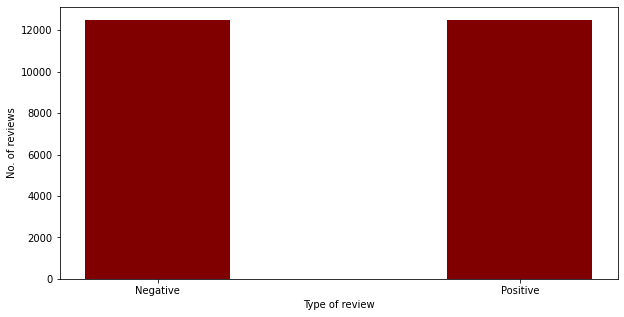

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  

fig = plt.figure(figsize = (10, 5)) 
courses = list(dicts.keys()) 
values = list(dicts.values()) 
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Type of review") 
plt.ylabel("No. of reviews") 
plt.show()

In [ ]:
dicts = {'Negative':0,'Positive':0}

for i in y_test:
  if(y_test[i] == 0):
    dicts['Negative'] += 1
  else:
    dicts['Positive'] += 1
print("Individual count of reviews in test labels",dict)

Individual count of reviews in test labels <class 'dict'>


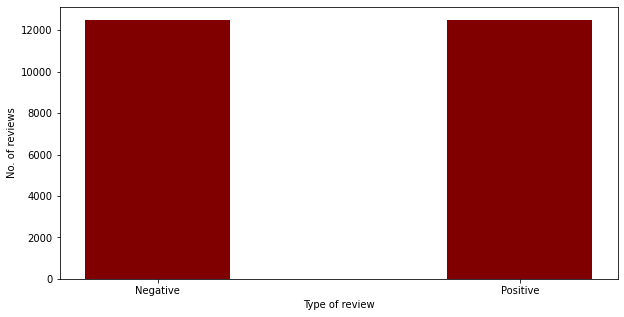

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  

fig = plt.figure(figsize = (10, 5)) 
courses = list(dicts.keys()) 
values = list(dicts.values()) 
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Type of review") 
plt.ylabel("No. of reviews") 
plt.show()

### Print value of any one feature and it's label (2 Marks)

Feature value

I have printed the 0th feature and 0th label

In [ ]:
#### Add your code here ####
print(X_train_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    1   14
   22   16   43  530  973 1622 1385   65  458 4468   66 3941    4  173
   36  256    5   25  100   43  838  112   50  670    2    9   35  480
  284    5  150    4  172  112  167    2  336  385   39    4  172 4536
 1111   17  546   38   13  447    4  192   50   16    6  147 2025   19
   14   22    4 1920 4613  469    4   22   71   87   12   16   43  530
   38   76   15   13 1247    4   22   17  515   17   12   16  626   18
    2    5   62  386   12    8  316    8  106    5    4 2223 5244   16
  480   66 3785   33    4  130   12   16   38  619    5   25  124   51
   36 

Label value

In [ ]:
#### Add your code here ####
print(y_train[0])

1


### Decode the feature value to get original sentence (2 Marks)

First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

Now use the dictionary to get the original words from the encodings, for a particular sentence

Get the sentiment for the above sentence
- positive (1)
- negative (0)

In [ ]:
#### Add your code here ####
word_index = imdb.get_word_index()
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
decode_review(X_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [ ]:
# get first 30 key, value pairs from id to word dictionary
from itertools import islice
print('First 30 key value pairs', '\n', list(islice(reverse_word_index.items(), 0, 30)))

First 30 key value pairs 
 [(34704, 'fawn'), (52009, 'tsukino'), (52010, 'nunnery'), (16819, 'sonja'), (63954, 'vani'), (1411, 'woods'), (16118, 'spiders'), (2348, 'hanging'), (2292, 'woody'), (52011, 'trawling'), (52012, "hold's"), (11310, 'comically'), (40833, 'localized'), (30571, 'disobeying'), (52013, "'royale"), (40834, "harpo's"), (52014, 'canet'), (19316, 'aileen'), (52015, 'acurately'), (52016, "diplomat's"), (25245, 'rickman'), (6749, 'arranged'), (52017, 'rumbustious'), (52018, 'familiarness'), (52019, "spider'"), (68807, 'hahahah'), (52020, "wood'"), (40836, 'transvestism'), (34705, "hangin'"), (2341, 'bringing')]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve
# Generic method to plot the VALIDATION curves
def plot_validation_curve(history, metrics):
    plt.clf()
    history_dict = history.history
    f, ax = plt.subplots(1, len(metrics), figsize=(16,6))
    for i, metric in enumerate(metrics):
        metric_values = history_dict[metric]
        val_metric_values = history_dict['val_' + metric]
        epochs = range(1, (len(history_dict[metric]) + 1))
        ax[i].plot(epochs, metric_values, 'bo:', label='Training ' + metric)
        ax[i].plot(epochs, val_metric_values, 'go-', label='Validation ' + metric)
        ax[i].set_title('Training and Validation ' + ('Accuracy' if metric=='accuracy' else 'Loss'))
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel('Accuracy' if metric=='acc' else 'Loss')
        ax[i].legend()
# Generic method to plot Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

# Generic method to print the classification report
def classification_summary(y_test, y_pred, y_proba):
    print('\033[1mTesting accuracy:\033[0m %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('_'*80)
    print('\033[1mConfusion matrix:\033[0m\n %s' % (confusion_matrix(y_test, y_pred)))
    print('_'*80)
    print('\033[1mClassification report:\033[0m\n %s' % (classification_report(y_test, y_pred)))
    print('_'*80)
    print('\033[1mPrecision-Recall curve\033[10m')
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    plot_prec_recall_vs_thresh(precision, recall, thresholds)

### Define model (10 Marks)
- Define a Sequential Model
- Add Embedding layer
  - Embedding layer turns positive integers into dense vectors of fixed size
  - `tensorflow.keras` embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unique integer number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn LabelEncoder.
  - Size of the vocabulary will be 10000
  - Give dimension of the dense embedding as 100
  - Length of input sequences should be 300
- Add LSTM layer
  - Pass value in `return_sequences` as True
- Add a `TimeDistributed` layer with 100 Dense neurons
- Add Flatten layer
- Add Dense layer

In [ ]:
vocab_size = 10000
max_len = 300
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length = max_len))
model.add(Dropout(0.25))
model.add(LSTM(200, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

### Compile the model (2 Marks)
- Use Optimizer as Adam
- Use Binary Crossentropy as loss
- Use Accuracy as metrics

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 0)  
mc = ModelCheckpoint('imdb_mode.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)

### Print model summary (2 Marks)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
dropout (Dropout)            (None, 300, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 300, 200)          240800    
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 100)          120400    
_________________________________________________________________
time_distributed (TimeDistri (None, 300, 100)          10100     
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3

### Fit the model (2 Marks)

In [ ]:
history = model.fit(X_train_padded,y_train,validation_split=0.05, epochs = 3, batch_size = 32, verbose = True, callbacks = [es, mc])

Epoch 1/3
743/743 [==============================] - ETA: 0s - loss: 0.3649 - accuracy: 0.8326
Epoch 00001: val_loss improved from inf to 0.30470, saving model to imdb_mode.h5
743/743 [==============================] - 884s 1s/step - loss: 0.3649 - accuracy: 0.8326 - val_loss: 0.3047 - val_accuracy: 0.8808
Epoch 2/3
743/743 [==============================] - ETA: 0s - loss: 0.1989 - accuracy: 0.9221
Epoch 00002: val_loss improved from 0.30470 to 0.27468, saving model to imdb_mode.h5
743/743 [==============================] - 912s 1s/step - loss: 0.1989 - accuracy: 0.9221 - val_loss: 0.2747 - val_accuracy: 0.8800
Epoch 3/3
743/743 [==============================] - ETA: 0s - loss: 0.1287 - accuracy: 0.9504
Epoch 00003: val_loss did not improve from 0.27468
743/743 [==============================] - 917s 1s/step - loss: 0.1287 - accuracy: 0.9504 - val_loss: 0.3166 - val_accuracy: 0.8840
Epoch 00003: early stopping


### Evaluate model (2 Marks)

In [ ]:
loss,accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy: {0:.2%}".format(accuracy))
print("Test Loss: {0:.2%}".format(loss))

782/782 [==============================] - 233s 298ms/step - loss: 0.3180 - accuracy: 0.8771
Test Accuracy: 87.71%
Test Loss: 31.80%


<Figure size 432x288 with 0 Axes>

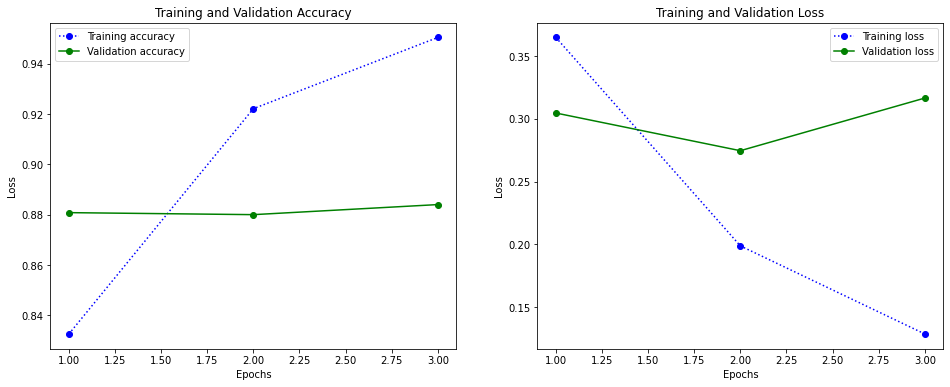

In [ ]:
# VALIDATION ACCURACY and LOSS Curve
plot_validation_curve(history, ['accuracy','loss'])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
Testing accuracy: 87.71%
________________________________________________________________________________
Confusion matrix:
 [[11100  1400]
 [ 1672 10828]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     12500
           1       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

_____________

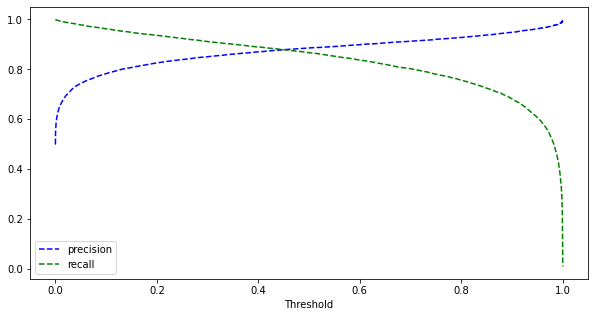

In [ ]:
y_pred = model.predict_classes(X_test_padded)
y_proba = model.predict_proba(X_test_padded)
classification_summary(y_test, y_pred, y_proba)

### Predict on one sample (2 Marks)

In [ ]:
sequence = X_test[123]
id_to_word = dict([(value, key) for (key, value) in imdb.get_word_index().items()])
decoded_review = ' '.join([id_to_word.get(idx-3, '?') for idx in sequence])
print(decoded_review)

prediction = model.predict_classes(pad_sequences([sequence], maxlen=300, padding='pre'))
print('Prediction for 123 test set is', prediction[0][0])
print('Actual y value', y_test[123])

? if you believe that any given war movie can make you really feel the war you need to see called the ? are flying in english it tells the story of ? ? and boris who are in love on the verge of wwii they are walking along the ? watching the ? fly by when the war starts boris is promptly sent off to war ? hides out with a family and ends up marrying the son whom she does not love boris meanwhile continues ? through the countryside fighting the nazis and experiencing all the horrors of war until he he runs out of energy when ? working in a military hospital receives this news she refuses to accept it until ? body arrives home on one of the trains simultaneously the radio ? that germany has ? and the allied powers have won the war the soviet union lost 27 million citizens but it's the start of a new era br br this movie did a very good job showing the human impact of the war not only in the battlefield but also how it affected the ? population this is definitely a movie that everyone shou

# Predicting the random review copied from google

In [ ]:
review = 'Just from reading the description your imagination will form a better plot, character, and story than what the movie presents on film. This is a two star film at best and I am being nice about it when I say that'
print('the review randomly copied from google is', review)
word_dict = imdb.get_word_index()
words = review.split()
review = []
for word in words:
    if word.lower() not in word_dict:
        review.append(2)
    else:
        review.append(word_dict[word.lower()] + 3)
prediction = model.predict_classes(pad_sequences([review], maxlen=300, padding='pre'))
print('Prediction for random review copied from google is', prediction[0][0])


the review randomly copied from google is Just from reading the description your imagination will form a better plot, character, and story than what the movie presents on film. This is a two star film at best and I am being nice about it when I say that
Prediction for random review copied from google is 1


# Retrieve the output of each layer in Keras for a given single test sample from the trained model you built

In [ ]:
from keras.models import Model

sample_x_test = X_test_padded[123]

for layer in model.layers:

    model_layer = Model(inputs = model.input, outputs = model.get_layer(layer.name).output)
    output = model_layer.predict(sample_x_test.reshape(1,-1))
    print('\n','--'*20, layer.name, 'layer', '--'*20, '\n')
    print(output)


 ---------------------------------------- embedding layer ---------------------------------------- 

[[[-0.02041961  0.02869122 -0.00020735 ... -0.00528141  0.03127735
   -0.00620846]
  [-0.02041961  0.02869122 -0.00020735 ... -0.00528141  0.03127735
   -0.00620846]
  [-0.02041961  0.02869122 -0.00020735 ... -0.00528141  0.03127735
   -0.00620846]
  ...
  [-0.03233155 -0.03882398  0.09565408 ... -0.00315351  0.01540229
   -0.04635985]
  [ 0.01842695  0.01397977  0.07384066 ... -0.05538068 -0.07398596
   -0.04688133]
  [ 0.00671875  0.0105644   0.01203394 ...  0.00197206  0.01844887
   -0.04370741]]]

 ---------------------------------------- dropout layer ---------------------------------------- 

[[[-0.02041961  0.02869122 -0.00020735 ... -0.00528141  0.03127735
   -0.00620846]
  [-0.02041961  0.02869122 -0.00020735 ... -0.00528141  0.03127735
   -0.00620846]
  [-0.02041961  0.02869122 -0.00020735 ... -0.00528141  0.03127735
   -0.00620846]
  ...
  [-0.03233155 -0.03882398  0.0956540

# Model - 2: Trying LSTM along with CNN

In [ ]:
# Model2
from keras.layers import Dense, Embedding, LSTM, Dropout, MaxPooling1D, Conv1D
vocab_size = 10000
max_len = 300
model2 = Sequential()
model2.add(Embedding(vocab_size, 256, input_length = max_len))
model2.add(Dropout(0.25))
model2.add(Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1))
model2.add(Conv1D(128, 5, padding = 'same', activation = 'relu', strides = 1))
model2.add(MaxPooling1D(pool_size = 2))
model2.add(Conv1D(64, 5, padding = 'same', activation = 'relu', strides = 1))
model2.add(MaxPooling1D(pool_size = 2))
model2.add(LSTM(75))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model2.summary())
# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 0)  
mc = ModelCheckpoint('imdb_model.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
history = model2.fit(X_train_padded,y_train,validation_split=0.05, epochs = 3, batch_size = 32, verbose = True, callbacks = [es, mc])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 256)          2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 256)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 256)          327936    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 128)          163968    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 150, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 150, 64)           41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 75, 64)           

In [ ]:
loss,accuracy = model2.evaluate(X_test_padded, y_test)
print("Test Accuracy: {0:.2%}".format(accuracy))
print("Test Loss: {0:.2%}".format(loss))

782/782 [==============================] - 147s 188ms/step - loss: 0.3415 - accuracy: 0.8826
Test Accuracy: 88.26%
Test Loss: 34.15%


<Figure size 432x288 with 0 Axes>

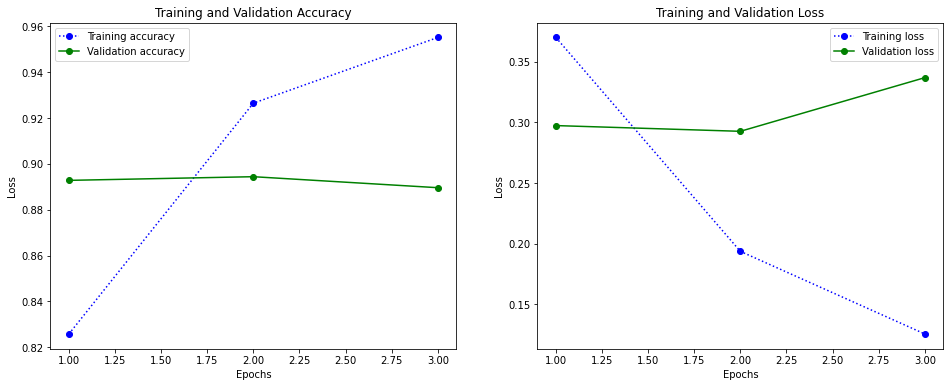

In [ ]:
# VALIDATION ACCURACY and LOSS Curve
plot_validation_curve(history, ['accuracy','loss'])

Testing accuracy: 88.26%
________________________________________________________________________________
Confusion matrix:
 [[10841  1659]
 [ 1276 11224]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     12500
           1       0.87      0.90      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

________________________________________________________________________________
Precision-Recall curve


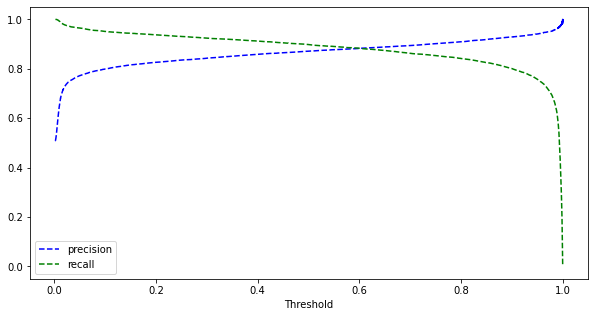

In [ ]:
y_pred = model2.predict_classes(X_test_padded)
y_proba = model2.predict_proba(X_test_padded)
classification_summary(y_test, y_pred, y_proba)

# Predict on one sample

In [ ]:
sequence = X_test[123]
id_to_word = dict([(value, key) for (key, value) in imdb.get_word_index().items()])
decoded_review = ' '.join([id_to_word.get(idx-3, '?') for idx in sequence])
print(decoded_review)

prediction = model2.predict_classes(pad_sequences([sequence], maxlen=300, padding='pre'))
print('Prediction for 123 test set is', prediction[0][0])
print('Actual y value', y_test[123])

? if you believe that any given war movie can make you really feel the war you need to see called the ? are flying in english it tells the story of ? ? and boris who are in love on the verge of wwii they are walking along the ? watching the ? fly by when the war starts boris is promptly sent off to war ? hides out with a family and ends up marrying the son whom she does not love boris meanwhile continues ? through the countryside fighting the nazis and experiencing all the horrors of war until he he runs out of energy when ? working in a military hospital receives this news she refuses to accept it until ? body arrives home on one of the trains simultaneously the radio ? that germany has ? and the allied powers have won the war the soviet union lost 27 million citizens but it's the start of a new era br br this movie did a very good job showing the human impact of the war not only in the battlefield but also how it affected the ? population this is definitely a movie that everyone shou

# Predicting the random review copied from google

In [ ]:
review = 'Just from reading the description your imagination will form a better plot, character, and story than what the movie presents on film. This is a two star film at best and I am being nice about it when I say that'
print('the review randomly copied from google is', review)
word_dict = imdb.get_word_index()
words = review.split()
review = []
for word in words:
    if word.lower() not in word_dict:
        review.append(2)
    else:
        review.append(word_dict[word.lower()] + 3)
prediction = model2.predict_classes(pad_sequences([review], maxlen=300, padding='pre'))
print('Prediction for random review copied from google is', prediction[0][0])


the review randomly copied from google is Just from reading the description your imagination will form a better plot, character, and story than what the movie presents on film. This is a two star film at best and I am being nice about it when I say that
Prediction for random review copied from google is 1


# Retrieve the output of each layer in Keras for a given single test sample from the trained model you built

In [ ]:
from keras.models import Model

sample_x_test = X_test_padded[123]

for layer in model2.layers:

    model_layer = Model(inputs = model2.input, outputs = model2.get_layer(layer.name).output)
    output = model_layer.predict(sample_x_test.reshape(1,-1))
    print('\n','--'*20, layer.name, 'layer', '--'*20, '\n')
    print(output)


 ---------------------------------------- embedding_1 layer ---------------------------------------- 

[[[-0.0468676  -0.05509865 -0.04157968 ...  0.04957299 -0.00495958
   -0.02545192]
  [-0.0468676  -0.05509865 -0.04157968 ...  0.04957299 -0.00495958
   -0.02545192]
  [-0.0468676  -0.05509865 -0.04157968 ...  0.04957299 -0.00495958
   -0.02545192]
  ...
  [-0.08651573 -0.03702917 -0.06432971 ... -0.02011725 -0.03146692
    0.06197859]
  [ 0.05569271  0.01556948  0.02965845 ...  0.0092725  -0.00577435
   -0.03535104]
  [-0.00214235 -0.09742702 -0.01098198 ... -0.0209276   0.02191247
   -0.02515045]]]

 ---------------------------------------- dropout_1 layer ---------------------------------------- 

[[[-0.0468676  -0.05509865 -0.04157968 ...  0.04957299 -0.00495958
   -0.02545192]
  [-0.0468676  -0.05509865 -0.04157968 ...  0.04957299 -0.00495958
   -0.02545192]
  [-0.0468676  -0.05509865 -0.04157968 ...  0.04957299 -0.00495958
   -0.02545192]
  ...
  [-0.08651573 -0.03702917 -0.064

# Conclusions

* I have loaded train, test data with 10000 most frequent words, padded them to 300 length.
* I implemented the model given by the team in Keras.
* I used 2 LSTM layers of 200, 100 and got 87% test accuracy and 0.31 test loss
* When I added CNN along with LSTM, we got 88.2 test accuracy and 0.34 test loss.
* LSTM takes lot of time to train, but gives better accuracy than normal neural network

Observations:
* The LSTM model tries to overfit right after 2 epochs, same happened with LSTM along woth CNN model.
* Embeddings look almost same and hence same test accuracy, but LSTM tend to overfit more.